In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
X = df.drop('price', axis = 1)

In [4]:
X

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


Assuming x0 is 1 (for bias term), Summation starts from 0 to n instead of 1 to n.

Add a column of ones to X to account for the intercept term

In [5]:
X = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)


In [10]:
X

array([[1.000e+00, 1.056e+03, 2.000e+00],
       [1.000e+00, 2.600e+03, 4.000e+00],
       [1.000e+00, 1.440e+03, 3.000e+00],
       [1.000e+00, 1.521e+03, 3.000e+00],
       [1.000e+00, 1.200e+03, 2.000e+00],
       [1.000e+00, 1.170e+03, 2.000e+00],
       [1.000e+00, 2.732e+03, 4.000e+00],
       [1.000e+00, 3.300e+03, 4.000e+00],
       [1.000e+00, 1.310e+03, 3.000e+00],
       [1.000e+00, 3.700e+03, 5.000e+00],
       [1.000e+00, 1.800e+03, 3.000e+00],
       [1.000e+00, 2.785e+03, 4.000e+00],
       [1.000e+00, 1.000e+03, 2.000e+00],
       [1.000e+00, 1.100e+03, 2.000e+00],
       [1.000e+00, 2.250e+03, 3.000e+00],
       [1.000e+00, 1.175e+03, 2.000e+00],
       [1.000e+00, 1.180e+03, 3.000e+00],
       [1.000e+00, 1.540e+03, 3.000e+00],
       [1.000e+00, 2.770e+03, 3.000e+00],
       [1.000e+00, 8.000e+02, 1.000e+00]])

In [115]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [116]:
# .values: converts the selected column into a numpy array
# .reshape(-1,1): reshapes the array to have one column and as many rows as needed
df.price.values

array([ 39.07, 120.  ,  62.  ,  75.  ,  51.  ,  38.  , 135.  , 155.  ,
        50.  , 167.  ,  82.  , 140.  ,  38.  ,  40.  , 101.  ,  42.  ,
        48.  ,  60.  , 102.  ,  32.  ])

In [13]:
df.price.values.reshape(df.shape[0],1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [117]:
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(df['price'].values.reshape(df.shape[0],1))  # 1D array -> 2D

In [118]:
X_scaled

array([[0.        , 0.08827586, 0.25      ],
       [0.        , 0.62068966, 0.75      ],
       [0.        , 0.22068966, 0.5       ],
       [0.        , 0.24862069, 0.5       ],
       [0.        , 0.13793103, 0.25      ],
       [0.        , 0.12758621, 0.25      ],
       [0.        , 0.6662069 , 0.75      ],
       [0.        , 0.86206897, 0.75      ],
       [0.        , 0.17586207, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.        , 0.34482759, 0.5       ],
       [0.        , 0.68448276, 0.75      ],
       [0.        , 0.06896552, 0.25      ],
       [0.        , 0.10344828, 0.25      ],
       [0.        , 0.5       , 0.5       ],
       [0.        , 0.12931034, 0.25      ],
       [0.        , 0.13103448, 0.5       ],
       [0.        , 0.25517241, 0.5       ],
       [0.        , 0.67931034, 0.5       ],
       [0.        , 0.        , 0.        ]])

### Batch Gradient Descent

We need to find the weights and the bias -> And this is the Linear Regression algo as well.

y = w1 * Area + w2 * Bedrooms + Bias

In [172]:
# Learning rate controls the pace of learning
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    m = X.shape[0]  # nos of datapoints
    n = X.shape[1]  # nos of features
    # initialize weights and cost function
    Theta = np.ones((n,1))        # nx1
    J_Theta = (1/2*m) * np.transpose(X @ Theta - y_true) @ (X @ Theta - y_true)
    
    cost = []
    epo = []
    for i in range(epochs):
        gradient = (1/m) * X.T @ (X @ Theta - y_true)  # nx1 vector for bias, w1 and w2
        Theta = Theta - learning_rate*gradient
        J_Theta = (1/2*m) * np.transpose(X @ Theta - y_true) @ (X @ Theta - y_true)
        
        if i%10 == 0:
            cost.append(J_Theta[0][0])
            epo.append(i)
            
    return Theta, J_Theta, cost, epo

In [173]:
Weights, Cost, Cost_List, Epoch_List = batch_gradient_descent(X_scaled, y_scaled, 1000, 0.01)

In [174]:
# These weights are the LR Model itself
Weights

array([[1.        ],
       [0.58395444],
       [0.37907193]])

In [121]:
Cost

array([[1.69980836]])

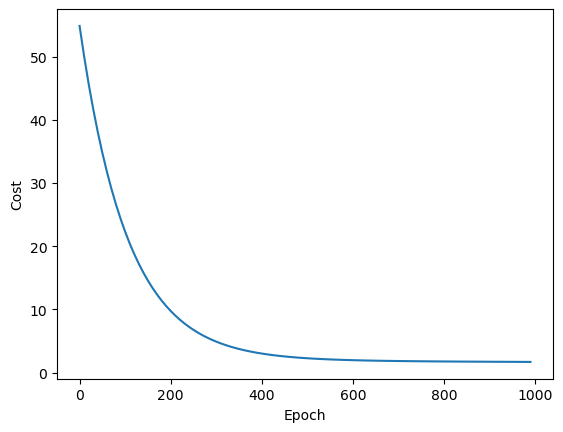

In [122]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(Epoch_List, Cost_List)

In [134]:
def predict_house_price(area, bedrooms, Weights):
    X_scaled = X_scaler.transform([[1,area,bedrooms]])
    y_scaled = Weights[1] * X_scaled[0][1] + Weights[2] * X_scaled[0][2] + Weights[0]
    
    return y_scaler.inverse_transform([y_scaled])

In [140]:
predict_house_price(1500, 2, Weights)

array([[198.822538]])

### Stochastic Gradient Descent

Instead of using all the samples, we will use randomly picked samples.

In [141]:
import random

In [190]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate):
    m = X.shape[0]
    n = X.shape[1]
    
    Theta = np.ones(shape = (n,1))
    J_Theta = 1
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, m-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        gradient = (1/m) * sample_x.T.reshape(-1,1) @ (sample_x @ Theta - sample_y) 
        Theta = Theta - learning_rate*gradient.reshape(-1,1)
        J_Theta = (1/2*m) * np.transpose(sample_x @ Theta - sample_y) @ (sample_x @ Theta - sample_y)
        
        if i%200 == 0:
            cost_list.append(J_Theta)
            epoch_list.append(i)
        
    return Theta, J_Theta, cost_list, epoch_list
    

In [191]:
Theta, J_Theta, cost_list, epoch_list = stochastic_gradient_descent(X_scaled, y_scaled, 20000, 0.01)

In [184]:
Theta

array([[1.        ],
       [0.58062277],
       [0.38395199]])

In [185]:
J_Theta

0.09407924066856363

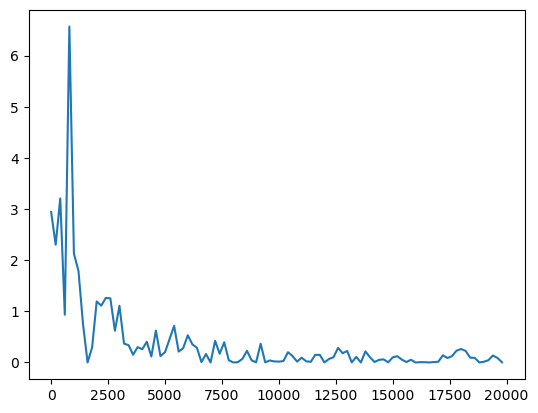

In [192]:
plt.plot(epoch_list,cost_list)

In [182]:
predict_house_price(2600, 4, Theta)

array([[263.01357417]])